<h4>Banking Dataset

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from memory_profiler import profile
warnings.filterwarnings("ignore")
import sklearn
import timeit
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import time
from memory_profiler import profile

In [ ]:
#importing the dataset
data=pd.read_csv("C:/Users/subha/OneDrive/Documents/bankdata.csv")
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#checking if the data has any missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.describe()  #to summarise the numeric attributes

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.describe(include='object')   #to summarise the categorical attributes

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


<h3>Data Visualisation</h3>

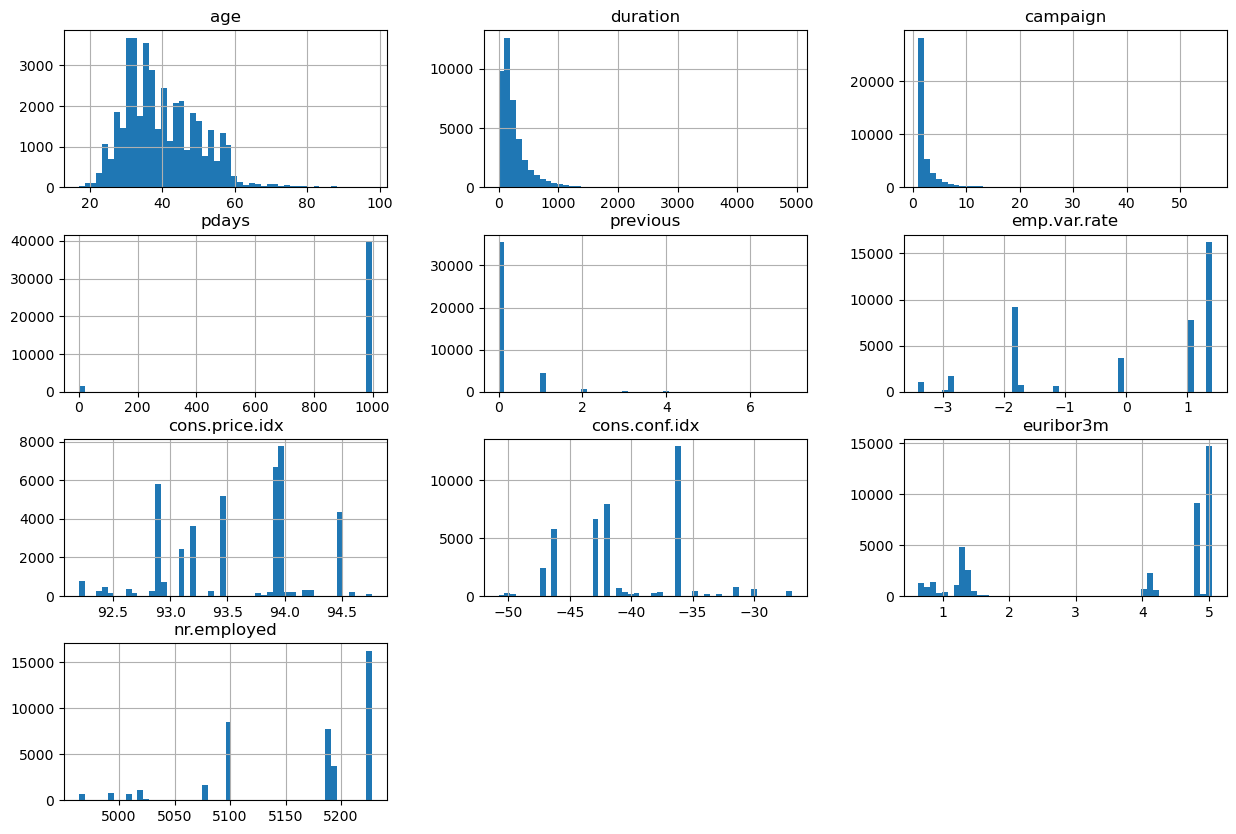

In [ ]:
data.hist(bins=50,figsize=(15,10))   #plots the graph of all the numeric attributes
plt.show()

<AxesSubplot:xlabel='default', ylabel='count'>

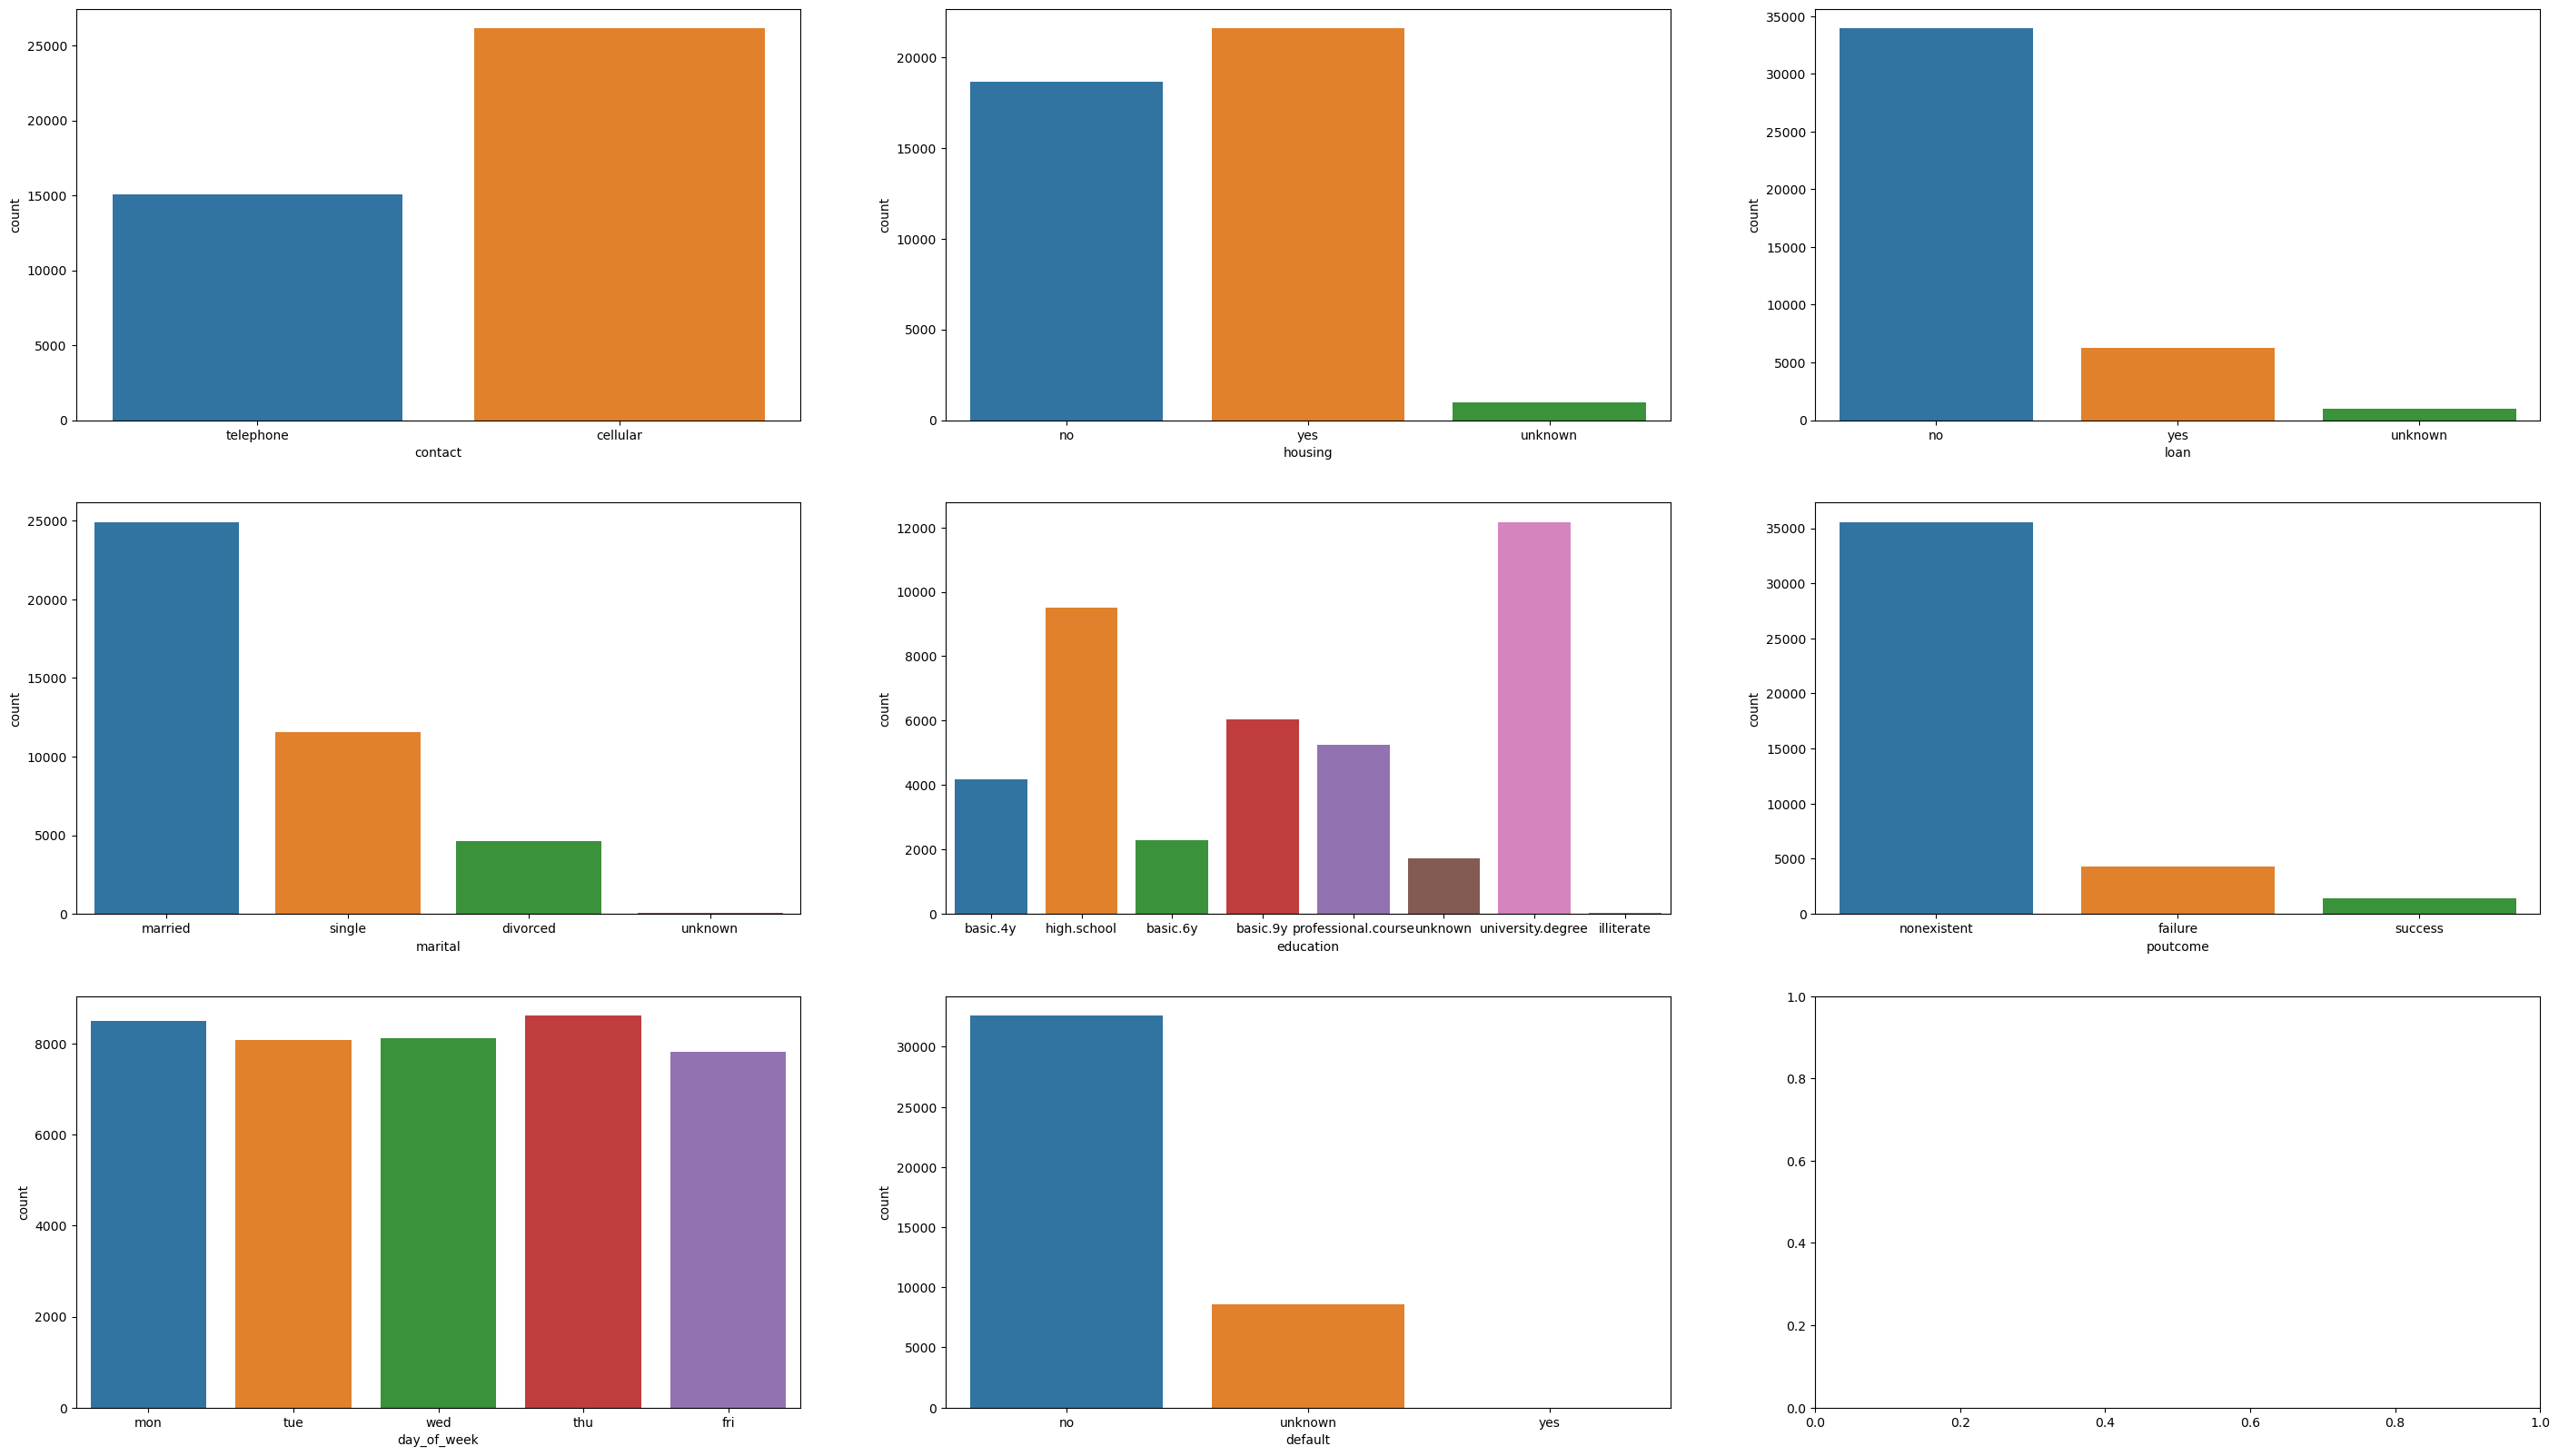

In [ ]:
#to plot the categorical attribute
import seaborn as sns
fig, ax = plt.subplots(3,3,figsize=(35,20))
sns.countplot(x="contact",data=data,ax=ax[0][0])
sns.countplot(x="housing",data=data,ax=ax[0][1])
sns.countplot(x="loan",data=data,ax=ax[0][2])
sns.countplot(x="marital",data=data,ax=ax[1][0])
sns.countplot(x="education",data=data,ax=ax[1][1])
sns.countplot(x="poutcome",data=data,ax=ax[1][2])
sns.countplot(x="day_of_week",data=data,ax=ax[2][0])
sns.countplot(x="default",data=data,ax=ax[2][1])

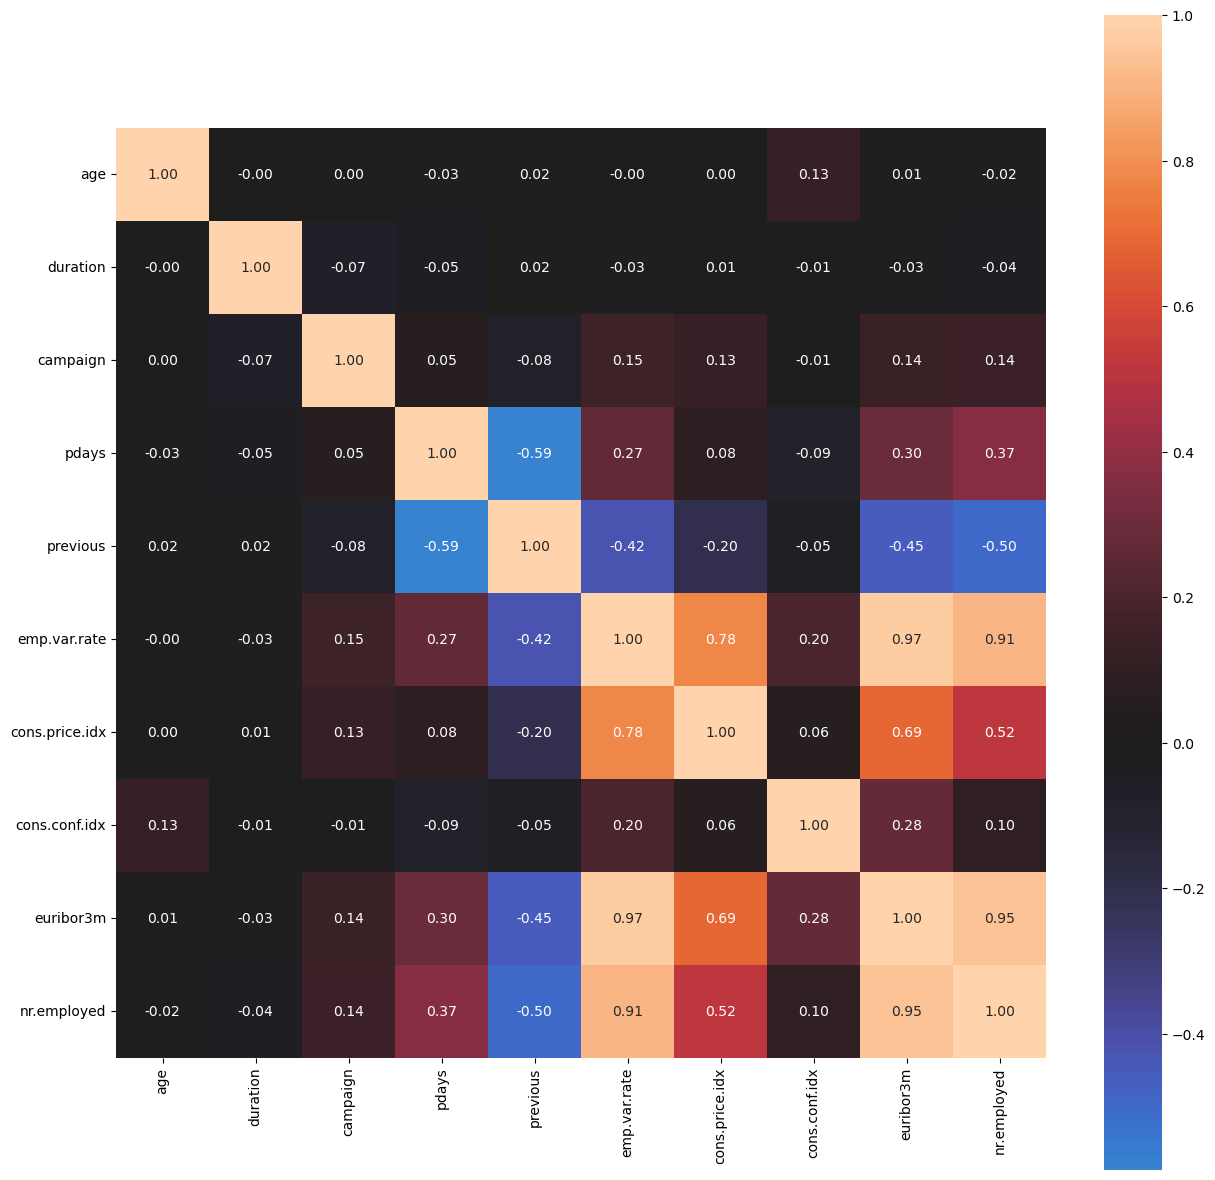

In [ ]:
#Plots the heatmap of numeric attributes

correlations = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, annot=True)
plt.show()

<h3>Data Preprocessing

The attribute 'duration' highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. So,we shall drop this attribute.

In [ ]:
data= data.drop(['duration'],axis=1) 
data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
col=list(data.select_dtypes(include=['object']))#extracting the categorical variables
col.remove('y')
col


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
#One-Hot encoding the categorical parameters using get_dummies() 
data = pd.get_dummies(data, columns = col)
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,...,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,...,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,...,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X_data = np.array(data.drop(['y'], axis = 1))
Y_data = np.array(data[['y']])
print(X_data.shape)
print(Y_data.shape)

(41188, 62)
(41188, 1)


<h3>Train test split

In [ ]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, shuffle=True, random_state=42)
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (32950, 62)
y_train -  (32950, 1)
X_test -  (8238, 62)
y_test -  (8238, 1)


<h2>1) Random Forest Classifier</h2>

<h4>i) Hyperparameter tuning using RandomizedSearchCV

In [ ]:
param_grid = {'n_estimators':list(range(100,320,20)),
               'min_samples_leaf':list(range(20,70,10))}
               
print(param_grid)


{'n_estimators': [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], 'min_samples_leaf': [20, 30, 40, 50, 60]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_Model=RandomForestClassifier(random_state=42,n_jobs=-1,max_features='auto',class_weight='balanced')
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 5, n_iter = 10,scoring='recall')
rf_RandomGrid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'min_samples_leaf': [20, 30, 40, 50,
                                                             60],
                                        'n_estimators': [100, 120, 140, 160,
                                                         180, 200, 220, 240,
                                                         260, 280, 300]},
                   scoring='recall')

In [ ]:
rf_RandomGrid.best_params_

{'n_estimators': 120, 'min_samples_leaf': 60}

<h4>ii) Fitting the random forest classifier with the best parameters.

              precision    recall  f1-score   support

          no       0.94      0.87      0.91      7303
         yes       0.38      0.60      0.47       935

    accuracy                           0.84      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.88      0.84      0.86      8238



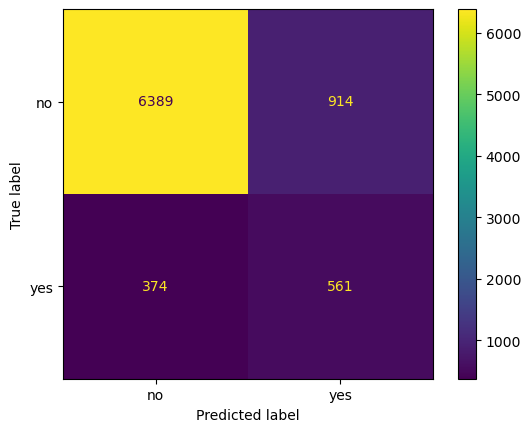

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_dt2= timeit.default_timer()

rnd_clf = RandomForestClassifier(n_estimators=120, random_state=42,min_samples_leaf=60,n_jobs=-1,max_features='auto',class_weight='balanced')
rnd_clf.fit(X_train, y_train)

stop_dt2 = time.perf_counter()
execution_time_dt2 = stop_dt2 - start_dt2

y_pred_rf = rnd_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_rf))

plot_confusion_matrix(rnd_clf, X_test, y_test)


In [ ]:
#execution time
print("execution time:",execution_time_dt2) 

execution time: 0.8924864000000525


In [ ]:
#memory storage
%reload_ext memory_profiler 

from memory_profiler import profile
%memit rnd_clf.fit(X_train,y_train)

peak memory: 418.61 MiB, increment: 8.56 MiB


<h2>2) Boosting with decision stumps

<h4>i) Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier(learning_rate = 0.5,base_estimator=DecisionTreeClassifier(max_depth=1,class_weight='balanced'))
params=[{'n_estimators':list(range(150,200,10))}]
adgrid=GridSearchCV(estimator=ad, param_grid=params, scoring='recall')
adgrid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=1),
                                          learning_rate=0.5),
             param_grid=[{'n_estimators': [150, 160, 170, 180, 190]}],
             scoring='recall')

In [ ]:
adgrid.best_params_

{'n_estimators': 150}

<h4>ii) Fitting Adaboost model with the best parameter

              precision    recall  f1-score   support

          no       0.95      0.86      0.90      7303
         yes       0.36      0.62      0.46       935

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



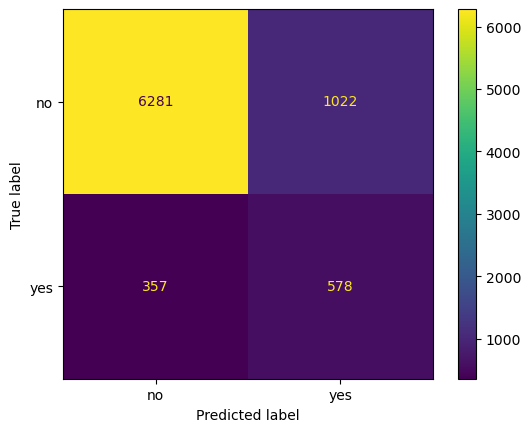

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
start_dt3= timeit.default_timer()
adaboost = AdaBoostClassifier(n_estimators = 150, learning_rate = 0.5,base_estimator=DecisionTreeClassifier(max_depth=1,class_weight='balanced')).fit(X_train, y_train)
stop_dt3 = time.perf_counter()
execution_time_dt3 = stop_dt3 - start_dt3

y_pred_ad = adaboost.predict(X_test)
print(metrics.classification_report(y_test, y_pred_ad))

plot_confusion_matrix(adaboost, X_test, y_test)


In [ ]:
#execution time
print("execution time:",execution_time_dt3)

execution time: 10.500204800000574


In [ ]:
#memory usage
%reload_ext memory_profiler
%memit adaboost.fit(X_train,y_train)

peak memory: 392.25 MiB, increment: 7.81 MiB


<h2>Decision tree

In [ ]:

param_grid3 = {'max_depth':list(range(1,16,2)), 'max_leaf_nodes':list(range(5,25))}
               
print(param_grid3)
                                                                      

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15], 'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dt_Model=DecisionTreeClassifier(random_state=42,class_weight='balanced')
dt_RandomGrid = RandomizedSearchCV(estimator = dt_Model, param_distributions = param_grid3, cv = 5, n_iter = 10,scoring='recall')
dt_RandomGrid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                      15],
                                        'max_leaf_nodes': [5, 6, 7, 8, 9, 10,
                                                           11, 12, 13, 14, 15,
                                                           16, 17, 18, 19, 20,
                                                           21, 22, 23, 24]},
                   scoring='recall')

In [ ]:
dt_RandomGrid.best_params_

{'max_leaf_nodes': 18, 'max_depth': 3}

In [ ]:
start_dt4 = timeit.default_timer()
clf_best=DecisionTreeClassifier(max_depth=18,max_leaf_nodes=3,random_state=42,class_weight='balanced')
clf_best.fit(X_train,y_train)  #fitting the model
ypred_dt=clf_best.predict(X_test)  #predicting the values on test set
stop_dt4 = time.perf_counter()
execution_time_dt4 = stop_dt4 - start_dt4

print(metrics.classification_report(y_test, ypred_dt))

              precision    recall  f1-score   support

          no       0.94      0.86      0.90      7303
         yes       0.35      0.58      0.44       935

    accuracy                           0.83      8238
   macro avg       0.65      0.72      0.67      8238
weighted avg       0.87      0.83      0.85      8238



In [ ]:
#execution time
print("execution time:",execution_time_dt4)

execution time: 0.10228400000050897


In [ ]:
#memory usage
%reload_ext memory_profiler
%memit clf_best.fit(X_train,y_train)

peak memory: 323.33 MiB, increment: 0.00 MiB


<h2>Naive Baye's Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
start_dt5= timeit.default_timer()
gn=GaussianNB()
gn.fit(X_train, y_train)
ypred_gn = gn.predict(X_test)
stop_dt5 = time.perf_counter()
execution_time_dt5 = stop_dt5 - start_dt5

print(metrics.classification_report(y_test, ypred_gn))

              precision    recall  f1-score   support

          no       0.93      0.90      0.91      7303
         yes       0.37      0.47      0.42       935

    accuracy                           0.85      8238
   macro avg       0.65      0.68      0.67      8238
weighted avg       0.87      0.85      0.86      8238



In [ ]:
#execution time
print("execution time:",execution_time_dt5)

execution time: 0.06089860000065528


In [ ]:
#memory usage
%reload_ext memory_profiler
%memit gn.fit(X_train,y_train)

peak memory: 324.86 MiB, increment: 0.06 MiB
